In [ ]:
#1. Загрузити файл з даними про споживання енергії “EnIn.xls”, який являєсобою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame. 

import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)

energy_data = pd.read_excel("En_In.xls", usecols="C:F", skiprows=17, skipfooter=38, names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values=['...'])

energy_data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.000,10.000,78.669
1,Albania,102.000,35.000,100.000
2,Algeria,1959.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554.000,28.000,45.322
223,Wallis and Futuna Islands,0.000,26.000,0.000
224,Yemen,344.000,13.000,0.000
225,Zambia,400.000,26.000,99.715


In [ ]:
#2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "...."), переконайтеся, що це відображається як значення np.NaN.

energy_data['Energy Supply'] = energy_data['Energy Supply'].multiply(1000000)
energy_data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.000,10.000,78.669
1,Albania,102000000.000,35.000,100.000
2,Algeria,1959000000.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9000000.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554000000.000,28.000,45.322
223,Wallis and Futuna Islands,0.000,26.000,0.000
224,Yemen,344000000.000,13.000,0.000
225,Zambia,400000000.000,26.000,99.715


In [ ]:
#4. Існує також декілька країн, що мають в назві цифри та/або дужки. Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)' повинна бути ‘Bolivia’,‘Switzerland17’ повинна бути Switzerland’.

energy_data["Country"] = (
    energy_data["Country"]
    .str.replace(r"\s*\(.*?\)", "", regex=True)
    .str.replace(r"\d+", "", regex=True)
)

energy_data.loc[energy_data['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641
24,Bolivia,336000000.000,32.000,31.477
164,South Korea,11007000000.000,221.000,2.279


In [ ]:
#3. Перейменуйте наступний список країн:
rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong",
}
energy_data["Country"] = energy_data["Country"].replace(rename_dict)

In [ ]:
#5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року.

gpd = pd.read_csv('gpd.csv', skiprows=4)

replace_dict = {
    'Korea, Rep.': 'South Korea', 
    'Iran, Islamic Rep.': 'Iran',
    'Hong Kong SAR, China': 'Hong Kong'
}

gpd.rename(columns={ 'Country Name': 'Country'}, inplace=True)
gpd = gpd.replace(replace_dict)
gpd.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN


In [ ]:
#6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та енергетичних технологій.

scimagojr = pd.read_excel('scimagojr.xlsx')

scimagojr

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134
3,4,United Kingdom,20944,20357,206091,37874,9.840,139
4,5,Russian Federation,18534,18301,34266,12422,1.850,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.000,0
187,188,Christmas Island,1,1,0,0,0.000,0
188,189,Reunion,1,1,2,1,2.000,1
189,190,Saint Lucia,1,1,0,0,0.000,0


In [ ]:
#7. Приєднайте три набори даних із завдань 1-6 до нового набору даних (використовуючи перетин назв країн).

gpd = gpd[['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

energy_gpd  = pd.merge(energy_data, gpd, how='inner', on='Country')
all_country = pd.merge(scimagojr, energy_gpd, how='inner', on='Country')

all_country = all_country.sort_values('Rank').head(15).set_index('Country')

all_country

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970
United Kingdom,4,20944,20357,206091,37874,9.840,139,7920000000.000,124.000,10.600,2419630700401.730,2482203235475.900,2470614405284.300,2367047611711.990,2403504326328.800,2450911011124.850,2479808627472.190,2533370110012.360,2605643189894.930,2666333396477.130
Russian Federation,5,18534,18301,34266,12422,1.850,57,30709000000.000,214.000,17.289,1385792607182.580,1504071117741.300,1583004071092.110,1459199142720.260,1524917468442.010,1589942641764.290,1645875899596.270,1666934123163.160,1678708855070.860,1616148858033.770
Canada,6,17899,17620,215003,40930,12.010,149,10431000000.000,296.000,61.945,1564468853329.450,1596739898466.320,1612713061250.240,1565144676082.310,1613406134731.120,1664086754804.890,1693132927878.080,1730687770724.130,1773485821199.770,1792608764608.810
Germany,7,17027,16831,140566,27426,8.260,126,13261000000.000,165.000,17.902,3332890754966.890,3441560834437.090,3478809377483.440,3283339933774.830,3417298013245.030,3542371125827.810,3556723774834.440,3567317390728.480,3624386278145.700,3685555907284.770
India,8,15005,14841,128763,37209,8.580,115,33195000000.000,26.000,14.969,1265894322131.090,1374865195244.500,1428360609657.800,1549482541544.700,1708458876829.920,1821872415623.620,1924235460945.250,2051981849791.690,2200616575310.970,2367206118959.060
France,9,13153,12973,130632,28601,9.930,114,10597000000.000,166.000,17.020,2607839735099.340,2669423841059.600,2674637086092.710,2595966887417.220,2646994701986.750,2702031788079.470,2706968211920.530,2722566887417.220,2729631788079.470,2761185430463.580


In [ ]:
#8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.
def task_eight():
    return all_country.loc[:, '2006':'2015'].mean(axis=1).sort_values(ascending=False)

task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
dtype: float64

In [ ]:
#9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.

def task_nine():
    name = vvp().index[4]
    country = all_country.loc[name]
    change = country.loc['2015'] - country.loc['2006']
    
    return (name, change.item())

task_nine()

('France', 153345695364.24023)

In [ ]:
# 10. Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable) та який саме відсоток.

def task_ten():
    name = all_country['% Renewable'].idxmax()
    percent = all_country['% Renewable'].max().item()
    return (name, percent)

task_ten()

('Brazil', 69.64803)

In [ ]:
#11. Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою

def task_eleven():
    all_country['Population'] = all_country['Energy Supply'] / all_country['Energy Supply per Capita']
    sixth = all_country.sort_values('Population', ascending=False).iloc[5]
    name = sixth.name
    population = sixth['Population'].item()
    return (name, population)

task_eleven()

('Japan', 127409395.97315437)

In [ ]:
#12. Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона).

def task_twelve():
    all_country['Citable documents per Capita'] = all_country['Citable documents'] / all_country['Population']
    corr = all_country['Citable documents per Capita'].corr(all_country['Energy Supply per Capita']).item()
    return corr

task_twelve()

0.7940010435442942

In [ ]:
#13. Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

def task_thirteen():
    median = all_country['% Renewable'].median()
    all_country['Median check renewable'] = all_country['% Renewable'].apply(lambda x: 1 if x >= median else 0)
    countries = all_country.sort_values('Rank')['Median renewable']
    return countries

task_thirteen()

In [ ]:
#14. Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.

continent_dictionary = {
    'China': 'Asia', 
    'United States': 'North America', 
    'Japan': 'Asia', 
    'United Kingdom': 'Europe', 
    'Russian Federation': 'Europe', 
    'Canada': 'North America', 
    'Germany': 'Europe', 
    'India': 'Asia', 
    'France': 'Europe', 
    'South Korea': 'Asia', 
    'Italy': 'Europe', 
    'Spain': 'Europe', 
    'Iran': 'Asia', 
    'Australia': 'Australia', 
    'Brazil': 'South America'
}

all_country['Continent'] = pd.Series(continent_dictionary)
all_country['Continent']

def task_fourteen():  
    frame = all_country.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std']) 
    return frame

task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,6,457929667.216,76321611.203,34647667.066
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,NaN


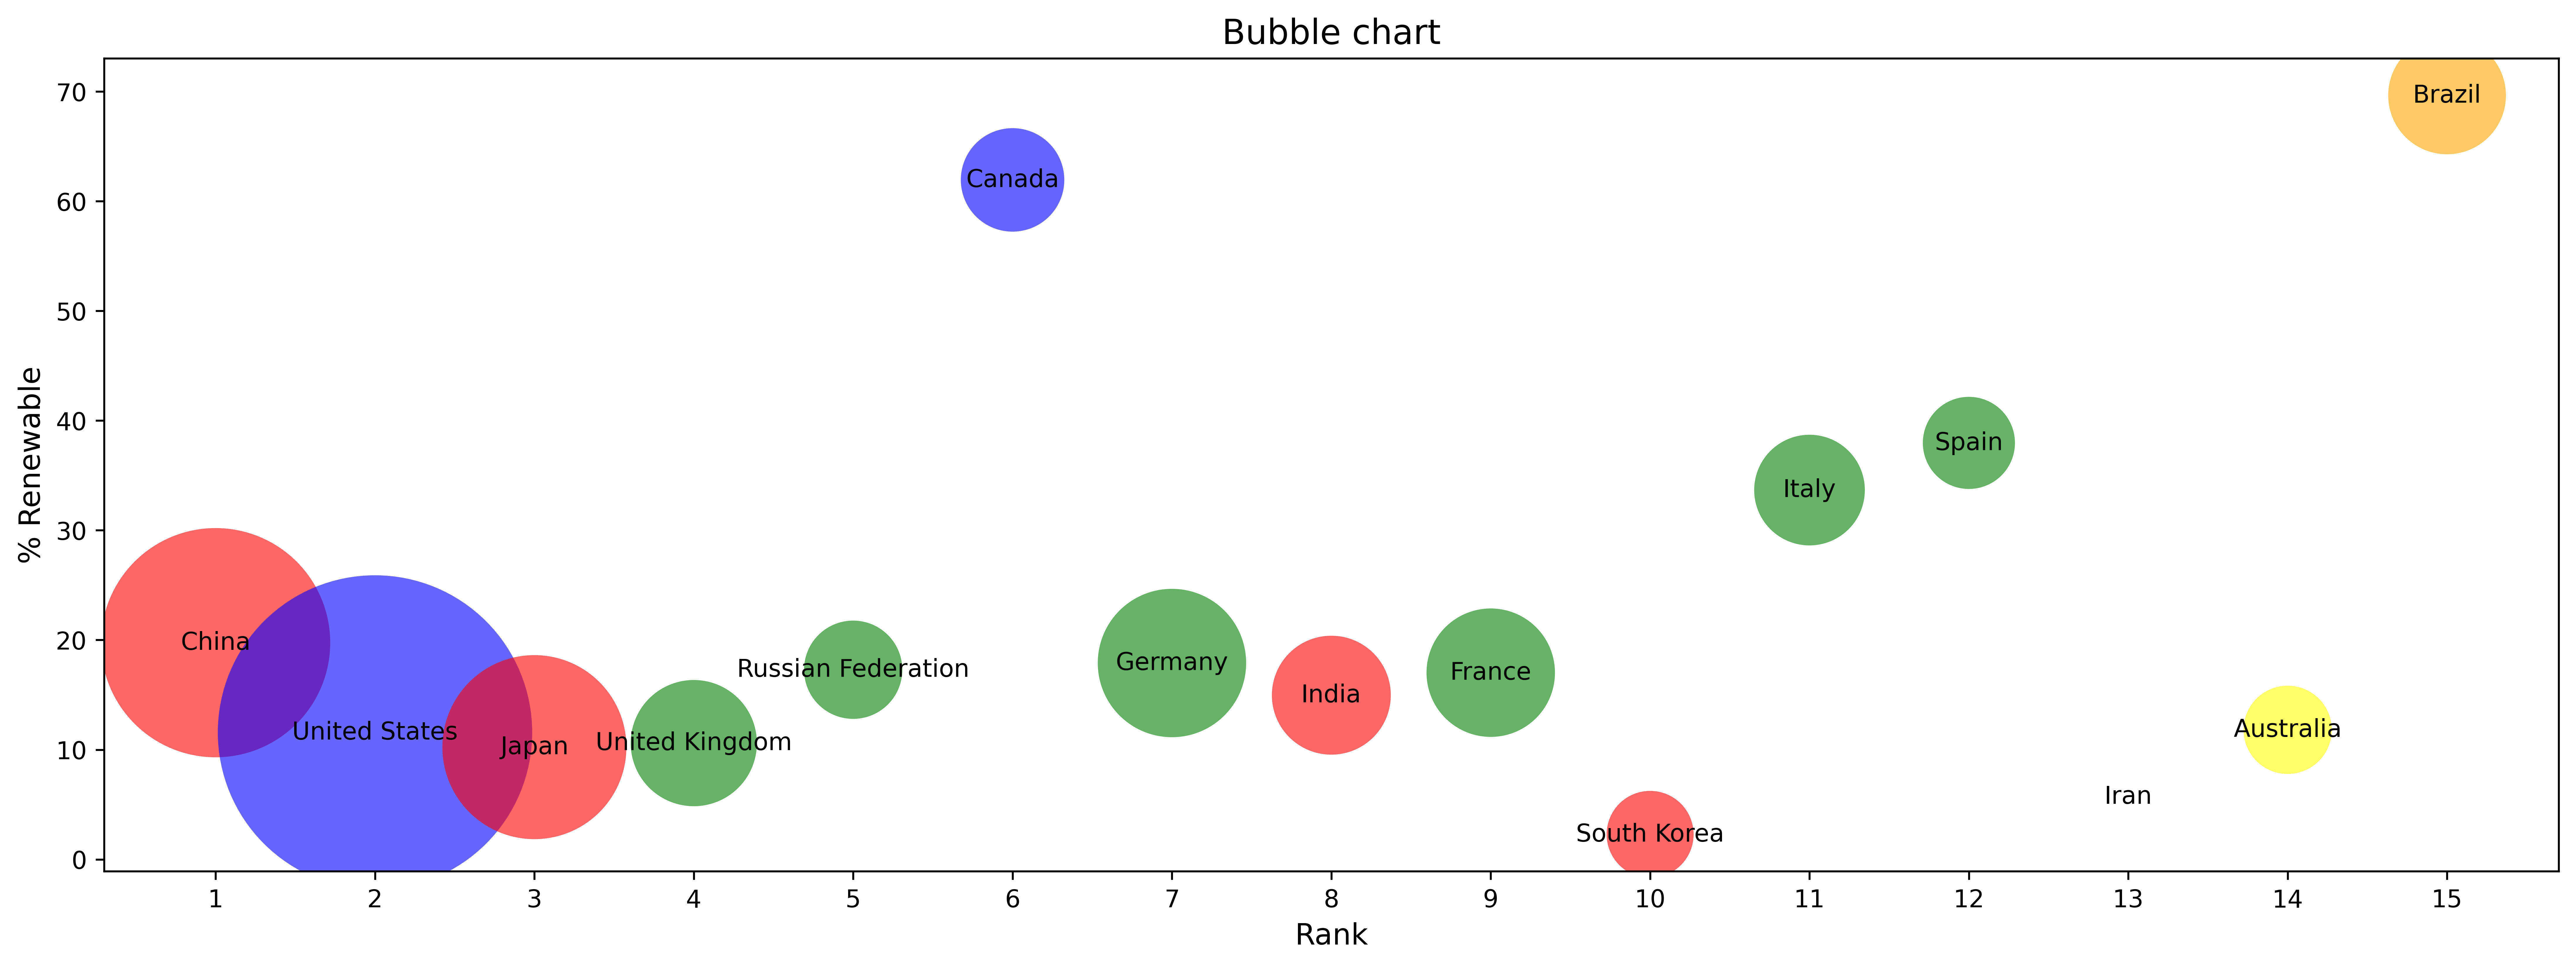

In [ ]:
#15. Створіть бульбашкову діаграму, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки відповідає ВВП країн 2015 року, а колір відповідає континенту.

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 6), dpi=600)
ax = fig.add_subplot(111)

continent_colors = {
    'Asia': 'red',
    'Australia': 'yellow',
    'Europe': 'green',
    'North America': 'blue',
    'South America': 'orange'
}
colors = all_country['Continent'].map(continent_colors)

scatter = ax.scatter(
    all_country['Rank'],
    all_country['% Renewable'],
    s=all_country['2015'] / 10e8,
    c=colors,
    alpha=0.6,
    linewidths=0.0
)

for idx, row in all_country.iterrows():
    ax.text(
        row['Rank'],
        row['% Renewable'],
        idx,
        ha='center',
        va='center'
    )

ax.set_title('Bubble chart', fontsize=14)
ax.set_xlabel('Rank', fontsize=12)
ax.set_ylabel('% Renewable', fontsize=12)
ax.set_xticks(all_country['Rank'])

plt.show()
